In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 单变量线性回归 Linear Regression with One Variable 

In [2]:
path = 'data/ex1data1.txt'
data = pd.read_csv(path, header = None,names = ['population', 'profit'])
data.head() # the former 5 rows

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


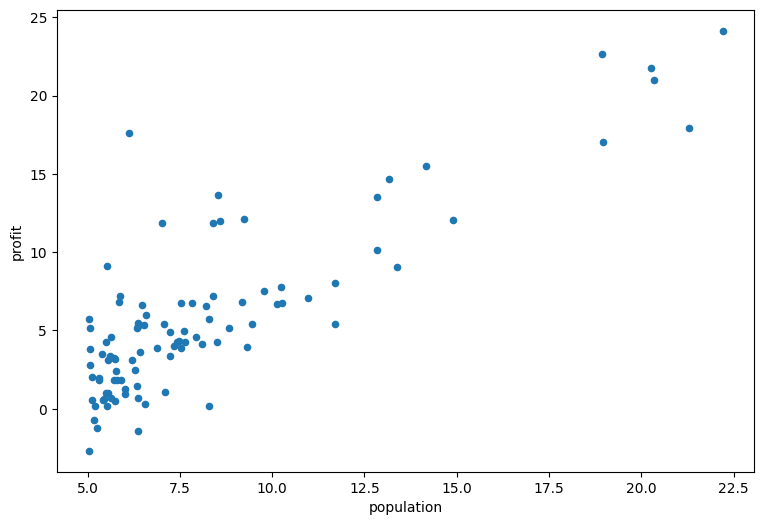

In [3]:
data.plot(kind='scatter', x='population', y='profit', figsize=(9,6))
plt.show()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Cost Function
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$

In [5]:
def computeCost(theta, X, y):
    inner = X @ theta.T - y
#     print(a.shape)
    inner = inner.T @ inner
    cost = inner / (2 * X.shape[0])
    
    return float(cost)

In [6]:
data.insert(0, 'Ones', 1)
data.head()

,Ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
X = np.array(data.iloc[:,:-1]) 
y = np.array(data.iloc[:,-1]) 

theta = np.zeros(X.shape[1])

In [8]:
print(X.shape, theta.shape, y.shape, theta.T.shape)
print(type(X))

(97, 2) (2,) (97,) (2,)
<class 'numpy.ndarray'>


In [9]:
print(computeCost(theta, X, y))

32.07273387745567


### Gradient Descent 
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [10]:
def gradient(theta, X, y):
    m = X.shape[0]
    a = X @ theta - y
    inner = X.T @ a
    return inner / m

def gradientDescent(X, y, theta, alpha, iters):
    temp_theta = np.zeros(theta.shape[0])
#     print(temp_theta)
    cost_data = []
    
    for i in range(iters):
        temp_theta = temp_theta - alpha * gradient(temp_theta, X, y)
        cost = computeCost(temp_theta, X, y)
        cost_data.append(cost)
        
    return temp_theta, cost_data

In [11]:
iterations = 1500
alpha = 0.01

In [12]:
theta, cost_data = gradientDescent(X, y, theta, alpha, iterations)
theta

array([-3.63029144,  1.16636235])

In [13]:
cost_data

[6.737190464870009,
 5.931593568604956,
 5.901154707081388,
 5.895228586444221,
 5.8900949431173295,
 5.885004158443646,
 5.879932480491418,
 5.874879094762573,
 5.869843911806386,
 5.864826865312929,
 5.8598278899321805,
 5.85484692057229,
 5.849883892376587,
 5.844938740722034,
 5.840011401218361,
 5.835101809707228,
 5.830209902261388,
 5.825335615183862,
 5.820478885007099,
 5.815639648492154,
 5.810817842627869,
 5.806013404630045,
 5.801226271940628,
 5.796456382226899,
 5.791703673380653,
 5.7869680835173956,
 5.782249550975539,
 5.777548014315596,
 5.772863412319381,
 5.768195683989214,
 5.76354476854712,
 5.758910605434049,
 5.754293134309077,
 5.749692295048629,
 5.745108027745684,
 5.740540272709012,
 5.735988970462381,
 5.731454061743792,
 5.726935487504702,
 5.722433188909257,
 5.717947107333528,
 5.713477184364749,
 5.709023361800549,
 5.704585581648199,
 5.700163786123856,
 5.695757917651815,
 5.691367918863751,
 5.68699373259798,
 5.682635301898707,
 5.6782925700152935,

**Visualization** 

In [14]:
b = theta[0]
m = theta[1]

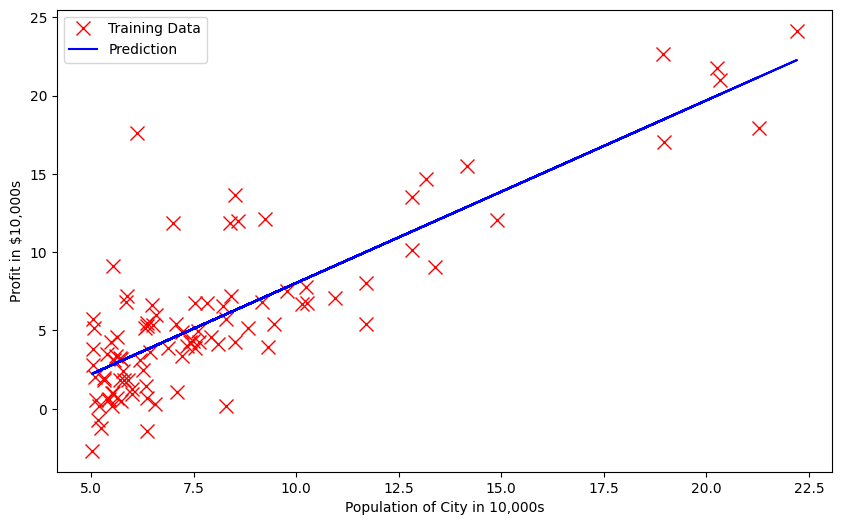

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(data.population, data.profit,'rx',markersize=10,label='Training Data')
plt.plot(data.population, m*data.population+b,"b-",label="Prediction")
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend(loc="best")
plt.show()